## Model-1
- **Feature Selection** : f_classif()
- **Modeling** - Logistic Regression, GradientBoostClassifier

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#%matplotlib.inline

In [2]:
sDir = '/home/pabhijit/data/'

In [3]:
def get_evaluation_matrices(y_actual, y_predicted, y_pred_prob_pos):
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score,auc

    # Accuracy Score
    print('----------------- Accuracy Score ----------------------------------')
    print('Accuracy Score : ', accuracy_score(y_actual, y_predicted).round(4))

    # Confusion Matrix
    print('\n----------------- Confusion Matrix --------------------------------')
    
    cmx = confusion_matrix(y_actual, y_predicted)
    '''
    f, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.title("Confusion Matrix", fontsize=20)
    ax.set_yticks(np.arange(cmx.shape[0]) + 0.5, minor=False)
    ax.set_xticklabels("")
    #ax.set_yticklabels(['Fraudaulant Transaction', 'Valid Transaction'], fontsize=16, rotation=360)
    plt.show()
    '''	
    print(cmx)


    tn = cmx[0,0]  # True  Negative
    fp = cmx[0,1]  # False Positive
    fn = cmx[1,0]  # False Negative
    tp = cmx[1,1]  # True  Positive

    print('\n----------------- TP,FP,TN,FN -------------------------------------')
    print('True  Positive : ', tp)
    print('False Positive : ', fp)
    print('True  Negative : ', tn)
    print('False Negative : ', fn)
    print('Number of Correct Predictions   (TP + TN) : ', tp + tn)
    print('Number of Incorrect Predictions (FP + FN) : ', fp + fn)

    print('\n----------------- Precision/Recall/F1-Score -----------------------')
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print('Precision          : ', precision.round(4))
    print('Recall/Sensitivity : ', recall.round(4))
    print('F1 Score           : ', f1_score.round(4))


    # Classification Report
    print('\n----------------- Classification Report ---------------------------')
    print(classification_report(y_actual, y_predicted))

    
    #### ROC Curve
    print('\n----------------- ROC Curve ---------------------------------------')
    '''
    - Every prediction the classifier makes has an associated probability.
    - Default probability threshold in scikit-learn is 50%
    - By default if the probability is 
        - more than 50%, then the will predict the data point belonging to positive class.
        - less than 50%, then the will predict the data point belonging to negative class.
    '''

    # Calculate the roc metrics
    fpr, tpr, thresholds = roc_curve(y_actual, y_pred_prob_pos)

    # Plot the ROC curve
    plt.plot(fpr,tpr);
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot([0, 1], [0, 1], "k--")
    plt.show()

    print('\n----------------- ROC AUC Score -----------------------------------')
    # Print the AUC
    print('ROC AUC Score : ', roc_auc_score(y_actual,y_pred_prob_pos).round(4))

In [4]:
df_obj = pd.read_pickle(sDir + 'step03_object.pkl')
df_num = pd.read_pickle(sDir + 'step03_numeric.pkl')
df_data = pd.concat([df_obj, df_num], axis=1)
del (df_obj, df_num)
df_data.shape

(290463, 1591)

In [5]:
df_data.head()

,VAR_0001_Q,VAR_0001_R,VAR_0005_C,VAR_0005_N,VAR_0005_S,VAR_0226_True,VAR_0230_True,VAR_0232_True,VAR_0236_True,VAR_0283_F,...,VAR_0859,VAR_0874,VAR_0886,VAR_0992,VAR_1008,VAR_1011,VAR_1531,VAR_1760,VAR_1824,target
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-99999,-99999,89,5,16,20,89,10,62,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,88,-99999,95,15,9,21,59,14,65,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-99999,-99999,82,7,12,13,73,4,997,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,10,1,72,26,45,47,55,7,95,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,37,-99999,81,13,7,15,67,13,76,1.0


In [6]:
df_data['target'].value_counts()

0.0    111458
1.0     33773
Name: target, dtype: int64

In [7]:
df_train = df_data[df_data['target'].notnull()]
df_train.shape

(145231, 1591)

In [8]:
df_test = df_data[df_data['target'].isnull()]
df_test.drop('target', axis=1, inplace=True)
df_test.shape

(145232, 1590)

In [9]:
df_y = df_train[['target']].astype(int)
df_x = df_train.drop(['target'], axis=1)
df_x.shape

(145231, 1590)

#### Get Top Features

In [10]:
%%time
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# chi2 
# This errored out with message, X needs to be non negative
# https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
#X_new = SelectKBest(chi2, k=100).fit_transform(df_x, df_y)
#X_new.shape


# f_classif
#https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py
#https://chrisalbon.com/machine_learning/feature_selection/anova_f-value_for_feature_selection/

selector = SelectKBest(f_classif, k=100)
#selector.fit(df_x, df_y)
#scores = -np.log10(selector.pvalues_)
#scores /= scores.max()

# Apply the SelectKBest object to the features and target
X_kbest = selector.fit_transform(df_x, df_y)

CPU times: user 4.17 s, sys: 9.06 s, total: 13.2 s
Wall time: 13.4 s


In [11]:
# Show results
print('Original number of features:', df_train.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 1591
Reduced number of features: 100


In [12]:
# Create a mask using an attribute of rfe
#mask = rfe.support_

mask = selector.get_support()
mask

array([False, False, False, ..., False, False,  True])

In [13]:
df_x_kbest = df_x.loc[:, mask]
idxKbestFeatrs = df_x_kbest.columns
idxKbestFeatrs

Index(['VAR_0232_True', 'VAR_1934_IAPS', 'VAR_0073_yy', 'VAR_0075_yy',
       'VAR_0073_mm', 'VAR_0853_1', 'VAR_0853_0', 'VAR_0854_1', 'VAR_0854_0',
       'VAR_0969_96', 'VAR_1022_0', 'VAR_1829_0', 'VAR_1830_0', 'VAR_0065_1',
       'VAR_0074_2500', 'VAR_0083_1', 'VAR_0086_1', 'VAR_0087_1', 'VAR_0101_0',
       'VAR_0103_0', 'VAR_0109_0', 'VAR_0111_0', 'VAR_0117_0', 'VAR_0119_0',
       'VAR_0141_0', 'VAR_0160_0', 'VAR_0164_0', 'VAR_0170_0', 'VAR_0172_0',
       'VAR_0174_0', 'VAR_0224_1', 'VAR_0225_1', 'VAR_0238_1', 'VAR_0503_0',
       'VAR_0505_0', 'VAR_0505_1', 'VAR_0511_0', 'VAR_0545_1', 'VAR_0626_0',
       'VAR_0631_0', 'VAR_0632_9998', 'VAR_0636_9998', 'VAR_0730_0',
       'VAR_0795_0', 'VAR_0885_100', 'VAR_0885_0', 'VAR_0918_0', 'VAR_0919_0',
       'VAR_0942_9996', 'VAR_0946_999999998', 'VAR_0972_1', 'VAR_0973_0',
       'VAR_1007_0', 'VAR_1021_0', 'VAR_1021_96', 'VAR_1046_0', 'VAR_1047_0',
       'VAR_1080_96', 'VAR_1086_0', 'VAR_1089_0', 'VAR_1099_400', 'VAR_1099_1',
     

In [14]:
df_x_kbest.head()

,VAR_0232_True,VAR_1934_IAPS,VAR_0073_yy,VAR_0075_yy,VAR_0073_mm,VAR_0853_1,VAR_0853_0,VAR_0854_1,VAR_0854_0,VAR_0969_96,...,VAR_1837_0,VAR_1840_9996,VAR_1872_0,VAR_1897_1,VAR_0900,VAR_0907,VAR_0970,VAR_0722,VAR_0886,VAR_1824
0,1.0,1.0,1.0,9.0,3,0,0,0,0,0,...,0,1,0,0,80000,80000,76857,3,89,62
1,0.0,1.0,4.0,9.0,9,1,0,1,0,0,...,0,1,0,1,5528,8301,5296,9,95,65
2,1.0,1.0,1.0,9.0,3,0,0,0,0,0,...,0,1,0,1,-99999,-99999,999999997,2,82,997
3,0.0,0.0,1.0,8.0,3,0,0,0,0,0,...,1,0,0,0,300,600,6313,16,72,95
4,1.0,0.0,1.0,9.0,3,0,0,0,0,0,...,0,1,0,1,10603,13840,13576,4,81,76


#### Train Test Split

In [15]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_x_kbest, df_y, test_size=.3, random_state=123)

In [17]:
#df_x_train = df_x_train.iloc[:,:50]
df_X_train.shape

(101661, 100)

### Model-1 : Logistic Regression

----------------- Accuracy Score ----------------------------------
Accuracy Score :  0.6481

----------------- Confusion Matrix --------------------------------
[[25992  7427]
 [ 7905  2246]]

----------------- TP,FP,TN,FN -------------------------------------
True  Positive :  2246
False Positive :  7427
True  Negative :  25992
False Negative :  7905
Number of Correct Predictions   (TP + TN) :  28238
Number of Incorrect Predictions (FP + FN) :  15332

----------------- Precision/Recall/F1-Score -----------------------
Precision          :  0.2322
Recall/Sensitivity :  0.2213
F1 Score           :  0.2266

----------------- Classification Report ---------------------------
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     33419
           1       0.23      0.22      0.23     10151

    accuracy                           0.65     43570
   macro avg       0.50      0.50      0.50     43570
weighted avg       0.64      0.65      0.65   

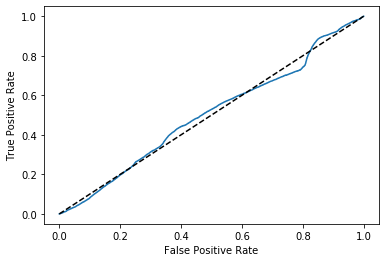


----------------- ROC AUC Score -----------------------------------
ROC AUC Score :  0.5026


In [18]:
# Instantiate Model
clf = LogisticRegression()

# Fit training data
clf.fit(df_X_train, df_y_train)

# Get the predictions
arr_y_pred = clf.predict(df_X_test)
#arr_y_pred_gb

# Get the prediction probabilities
arr_y_pred_proba = clf.predict_proba(df_X_test)
#arr_y_pred_proba_gb

# Default probability
arr_y_pred_proba_def = arr_y_pred_proba[:,1]
#arr_y_pred_proba_def

get_evaluation_matrices(df_y_test, arr_y_pred, arr_y_pred_proba_def)

### Model-2 : GradientBoostingClassifier

----------------- Accuracy Score ----------------------------------
Accuracy Score :  0.7811

----------------- Confusion Matrix --------------------------------
[[32032  1387]
 [ 8152  1999]]

----------------- TP,FP,TN,FN -------------------------------------
True  Positive :  1999
False Positive :  1387
True  Negative :  32032
False Negative :  8152
Number of Correct Predictions   (TP + TN) :  34031
Number of Incorrect Predictions (FP + FN) :  9539

----------------- Precision/Recall/F1-Score -----------------------
Precision          :  0.5904
Recall/Sensitivity :  0.1969
F1 Score           :  0.2953

----------------- Classification Report ---------------------------
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     33419
           1       0.59      0.20      0.30     10151

    accuracy                           0.78     43570
   macro avg       0.69      0.58      0.58     43570
weighted avg       0.75      0.78      0.74    

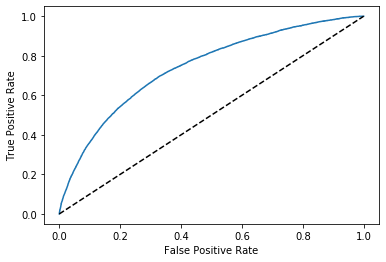


----------------- ROC AUC Score -----------------------------------
ROC AUC Score :  0.742


In [19]:
# Instantiate Model
clf = GradientBoostingClassifier()

# Fit training data
clf.fit(df_X_train, df_y_train)

# Get the predictions
arr_y_pred = clf.predict(df_X_test)
#arr_y_pred_gb

# Get the prediction probabilities
arr_y_pred_proba = clf.predict_proba(df_X_test)
#arr_y_pred_proba_gb

# Default probability
arr_y_pred_proba_def = arr_y_pred_proba[:,1]
#arr_y_pred_proba_def

get_evaluation_matrices(df_y_test, arr_y_pred, arr_y_pred_proba_def)

## Model-3 : RandomForestClassifier

----------------- Accuracy Score ----------------------------------
Accuracy Score :  0.781

----------------- Confusion Matrix --------------------------------
[[32105  1314]
 [ 8228  1923]]

----------------- TP,FP,TN,FN -------------------------------------
True  Positive :  1923
False Positive :  1314
True  Negative :  32105
False Negative :  8228
Number of Correct Predictions   (TP + TN) :  34028
Number of Incorrect Predictions (FP + FN) :  9542

----------------- Precision/Recall/F1-Score -----------------------
Precision          :  0.5941
Recall/Sensitivity :  0.1894
F1 Score           :  0.2873

----------------- Classification Report ---------------------------
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     33419
           1       0.59      0.19      0.29     10151

    accuracy                           0.78     43570
   macro avg       0.70      0.58      0.58     43570
weighted avg       0.75      0.78      0.73     

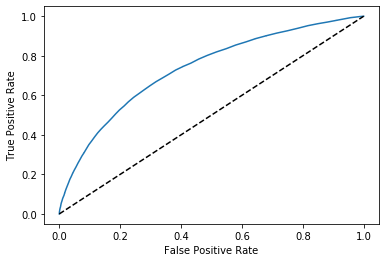


----------------- ROC AUC Score -----------------------------------
ROC AUC Score :  0.733


In [21]:
# Instantiate Model
clf = RandomForestClassifier()

# Fit training data
clf.fit(df_X_train, df_y_train)

# Get the predictions
arr_y_pred = clf.predict(df_X_test)
#arr_y_pred_gb

# Get the prediction probabilities
arr_y_pred_proba = clf.predict_proba(df_X_test)
#arr_y_pred_proba_gb

# Default probability
arr_y_pred_proba_def = arr_y_pred_proba[:,1]
#arr_y_pred_proba_def

get_evaluation_matrices(df_y_test, arr_y_pred, arr_y_pred_proba_def)

### Predict Submission Set

In [22]:
df_submission = pd.read_csv(sDir + 'sample_submission.csv')
df_submission.shape

(145232, 2)

In [23]:
# Get the predictions
arr_target = clf.predict(df_test[idxKbestFeatrs])
len(arr_target)

145232

In [24]:
df_submission['target'] = arr_target

In [25]:
df_submission.head()

,ID,target
0,1,0
1,3,1
2,6,0
3,9,0
4,10,0


In [27]:
df_submission.to_csv(sDir + 'submission.csv', index=False)